In [122]:
import pandas as pd
import numpy as np
import pylab

In [123]:
# load files and process
vocab_fh = 'hw4_vocab.txt'
unigram_fh = 'hw4_unigram.txt'
bigram_fh = 'hw4_bigram.txt'

vocab_list, counts_list = [],[]
with open(vocab_fh) as inFile:
    vocab_list = inFile.read().splitlines()
with open(unigram_fh) as inFile:
    for line in inFile:
        counts_list.append(int(line.strip()))
dfBigram = pd.read_table(bigram_fh, names=['index(w1)', 'index(w2)', 'count(w1,w2)'])

totWords = sum(count for count in counts_list)
count_dict = dict(zip(vocab_list, counts_list))

In [124]:
# 4.3a
M_list = [word for word in vocab_list if (word[0] == 'M')]
def unigram(word):
    wordCount = count_dict[word]
    return(wordCount/totWords)

with open('hw4.3a_out.txt','w') as out_fh:
    for word in M_list:
        out_fh.write(word + ' ' + str(unigram(word)) + '\n')

In [125]:
# 4.3b

# w2 follows w1
def bigram(w1, w2):
    w1Tot = count_dict[w1]
    w1_idx = vocab_list.index(w1) + 1
    w2_idx = vocab_list.index(w2) + 1
    count = dfBigram['count(w1,w2)'].loc[(dfBigram['index(w1)'] == w1_idx) & (dfBigram['index(w2)'] == w2_idx),]
    if count.shape[0] != 0:
        return(float(count)/w1Tot) 
    else:
        return(0)

# 10 most likely words to follow the word "THE", along with their numerical bigram probabilities
the_idx = vocab_list.index('THE') + 1
subdf = dfBigram.loc[dfBigram['index(w1)'] == the_idx]
subdf.sort_values(by='count(w1,w2)', ascending=False, inplace=True)
subdf = subdf.reset_index(drop=True).iloc[0:10,:]
w2_list = []
for each in list(subdf['index(w2)']):
    w2_list.append(vocab_list[each-1])
p_bigram_out = []
for w2 in w2_list:
    p_bigram_out.append(bigram('THE', w2)) 

# write output to file
with open('hw4.3b_out_test.txt','w') as outfh:
    for i in range(len(w2_list)):
        outfh.write(w2_list[i] + ' ' + str(p_bigram_out[i]) + '\n')

/home/jlzhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [126]:
# 4.3c
print('4.3c')
c_sentence_u = ['THE','STOCK','MARKET','FELL','BY','ONE','HUNDRED','POINTS','LAST','WEEK']
c_sentence_b = ['<s>','THE','STOCK','MARKET','FELL','BY','ONE','HUNDRED','POINTS','LAST','WEEK']
print(' '.join(c_sentence_u))

# unigram model
p_unigram_c = []
for word in c_sentence_u:
    p_unigram_c.append(unigram(word))
likelihood_u = np.log(np.prod(np.asarray(p_unigram_c)))
print('L_u = %f' % likelihood_u)

# bigram model
p_bigram_c = []
for i in range(1,len(c_sentence_b)):
    w1_idx = i-1
    w2_idx = i
    p_bigram_c.append(bigram(c_sentence_b[w1_idx], c_sentence_b[w2_idx]))
likelihood_b = np.log(np.prod(np.asarray(p_bigram_c)))
print('L_b = %f' % likelihood_b)


4.3c
THE STOCK MARKET FELL BY ONE HUNDRED POINTS LAST WEEK
L_u = -64.509440
L_b = -40.918132


In [127]:
# 4.3d
print('4.3d')
d_sentence_u = ['THE','SIXTEEN','OFFICIALS','SOLD','FIRE','INSURANCE']
d_sentence_b = ['<s>','THE','SIXTEEN','OFFICIALS','SOLD','FIRE','INSURANCE']
print(' '.join(d_sentence_u))

# unigram model
p_unigram_d = []
for word in d_sentence_u:
    p_unigram_d.append(unigram(word))
likelihood_u = np.log(np.prod(np.asarray(p_unigram_d)))
print('L_u = %f' % likelihood_u)

# bigram model
p_bigram_d = []
for i in range(1,len(d_sentence_b)):
    w1_idx = i-1
    w2_idx = i
    p_bigram_d.append(bigram(sentence_b[w1_idx], d_sentence_b[w2_idx]))
likelihood_b = np.log(np.prod(np.asarray(p_bigram_d)))
if np.isinf(likelihood_b):
    print('Warning: divide by zero encountered in log, returning 0')
    likelihood_b == 0
print('L_b = %f' % likelihood_b_adj)


4.3d
THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE
L_u = -44.291934
L_b = 0.000000


/home/jlzhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


/home/jlzhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


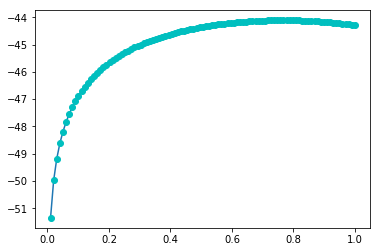

optimal value of lambda = 0.77


In [128]:
# 4.3e

# mixed model
def log_Pm(lambda_val):
    Pm_list = []
    for i in range(len(p_unigram_d)):
        Pm = lambda_val*p_unigram_d[i] + (1-lambda_val)*p_bigram_d[i]
        Pm_list.append(Pm)
    out = np.log(np.prod(np.asarray(Pm_list)))
#     if np.isinf(out):
#         print('Warning: divide by zero encountered in log, returning 0')
#         out = 0
    return(out)

# generate plot data
lambda_arr = np.linspace(0,1,100)
vfunc = np.vectorize(log_Pm)
y = vfunc(lambda_arr)

# plot
pylab.plot(lambda_arr,y)
pylab.plot(lambda_arr,y,'co') # same function with cyan dots
pylab.show() # show the plot

# max value
print('optimal value of lambda = ' + format(lambda_arr[y.argmax()], '.2f'))
